In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Binarizer, Imputer, \
    OneHotEncoder, PolynomialFeatures, StandardScaler, \
    MinMaxScaler, RobustScaler

# Import the training dataset

In [123]:
df = pd.read_csv('datasets/train.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6.0,6
1,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8.0,10
2,GP,F,NaN,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,NaN,15
3,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10.0,10
4,GP,F,NaN,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5.0,6


This data set comes from the [Student Performance](http://archive.ics.uci.edu/ml/datasets/Student+Performance) dataset at the University of Calforina at Irvine Machine Learning Repository. It details student performance in schools in Portugal as regards to mathematics. It contains the following features:

- school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
- sex - student's sex (binary: "F" - female or "M" - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: "U" - urban or "R" - rural)
- famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
- Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
- Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
- guardian - student's guardian (nominal: "mother", "father" or "other")
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)
- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

# Import the test set

In [124]:
test_df = pd.read_csv('datasets/test.csv')
test_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5.0,6
1,GP,M,NaN,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15.0,15
2,GP,M,16.0,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12.0,11
3,GP,M,15.0,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15.0,15
4,GP,F,NaN,U,GT3,T,2,1,services,other,...,5,2,2,1,1,4,4,10,12.0,12


# `.reshape(-1, 1)`???

Sklearn has become fairly strict over the years about the shape of the numpy arrays / pandas dataframes that it will accept for certain situations. Let's walk through a couple of these transformations.

#### `pd.DataFrame().values`

`.values` on a Pandas dataframe returns the underlying `numpy` array. On a 2D dataframe (with a set of columns), we get an array that has the expected shape:

In [12]:
numpy_array = df[['G1', 'G2']].values
print('shape:\n', numpy_array.shape, '\n',
      'first five rows:\n', numpy_array[0:5, :])
print(type(numpy_array))

shape:
 (190, 2) 
 first five rows:
 [[  5.   6.]
 [  7.   8.]
 [ 15.  nan]
 [  6.  10.]
 [  6.   5.]]
<class 'numpy.ndarray'>


In [11]:
 pd.__version__

'0.20.1'

In [13]:
numpy_array = df[['G1', 'G2']].values
print('shape:\n', numpy_array.shape, '\n',
      'first five rows:\n', numpy_array[0:5])
print(type(numpy_array))

shape:
 (190, 2) 
 first five rows:
 [[  5.   6.]
 [  7.   8.]
 [ 15.  nan]
 [  6.  10.]
 [  6.   5.]]
<class 'numpy.ndarray'>


In other words, we receive an array of arrays. 

This is the typical shape that `sklearn` expects from `numpy`:
  - Each row is its own array
  - The shape should be (number of rows, number of columns)
  
However, look at what happens when we call `.values` from Pandas on one column:

In [14]:
numpy_array = df['G1'].values
print('shape:\n', numpy_array.shape, '\n',
      'first five elements:\n', numpy_array[0:5])

shape:
 (190,) 
 first five elements:
 [ 5  7 15  6  6]


We have a **1 Dimensional Array** that `sklearn` will interpret as a single _row_ of data with 190 elements.

We want `sklearn` to interpret that data, however, as **190 rows** of **one element each**. There are two ways to do this:

#### Coercion in Pandas

In [128]:
numpy_array = df[['G1']].values
print('shape:\n', numpy_array.shape, '\n',
      'first five elements:\n', numpy_array[0:5, : ])

shape:
 (190, 1) 
 first five elements:
 [[ 5]
 [ 7]
 [15]
 [ 6]
 [ 6]]


Always enclosing the single column name in `[]` (so that there are two sets of `[]` will force the column to have **190 rows** and **one element per row**

#### Using `numpy`'s reshape to do it after the fact

In [16]:
numpy_array = df['G1'].values.reshape(-1, 1)
print('shape:\n', numpy_array.shape, '\n',
      'first five elements:\n', numpy_array[0:5])

shape:
 (190, 1) 
 first five elements:
 [[ 5]
 [ 7]
 [15]
 [ 6]
 [ 6]]


We can use `numpy`'s reshape command to coerce the array to have the maximum possible value (`-1`) for the number of rows and `1` element per row.

I'll be using the latter (`df['G1'].values.reshape(-1, 1)`) but you should feel free to use either. **However** not doing this can lead to strange behavior on the part of `sklearn`, so make sure that you are doing it. 

# Joining `numpy` arrays

For parts of the following lesson and lab, knowing how to join numpy arrays may be helpful. Here is a quick tutorial:

In [131]:
array_1 = df[['G1']].values
array_2 = df[['G2']].values
print(array_1.shape, array_2.shape)
print (array_1[0:5, :])
print (array_2[0:5, :])

(190, 1) (190, 1)
[[ 5]
 [ 7]
 [15]
 [ 6]
 [ 6]]
[[  6.]
 [  8.]
 [ nan]
 [ 10.]
 [  5.]]


Notice that we should check that our arrays have the same size!

Next we'll use numpy's `concatenate` method to join the two arrays together. This is very similar to using Panda's `concat` method.

In [132]:
array_3 = np.concatenate([array_1, array_2], axis=1)
print(array_3.shape)
print(array_3[0:5, :])

(190, 2)
[[  5.   6.]
 [  7.   8.]
 [ 15.  nan]
 [  6.  10.]
 [  6.   5.]]


`np.concatenate` takes a list of arrays and the axis to add the new values to. 

#### Axis values

- `axis=0`: create new rows for the values (join to the bottom of the array)
- `axis=1`: create new columns for the values (join to the right of the array)

Because we want to join them so that we have _new_ columns but the same number of row, we'll choose to join them on the second axis (columns, i.e., `axis=1`). Typically we will want to choose `axis=1`

# Binarizer

Binarizer will return a numpy array with a dummy variable based on a cutoff you give it.

Let's assume that we want to create a dummy variable based on whether `G1` is above the midpoint (10). 

We would do that in the following way (remembering to **fit** once and **transform** multiple times)

In [133]:
g1_binarizer = Binarizer(10)
g1_binarizer.fit(df['G1'].values.reshape(-1,1))
g1_grades = g1_binarizer.transform(
    df['G1'].values.reshape(-1, 1))
print(g1_grades[0:5], g1_grades.mean())

[[0]
 [0]
 [1]
 [0]
 [0]] 0.473684210526


Now let's see how this applies to the test data:

In [102]:
g1_grades_test = g1_binarizer.transform(
    test_df['G1'].values.reshape(-1, 1))
print(g1_grades_test[0:5], g1_grades_test.mean())

[[0]
 [1]
 [1]
 [1]
 [0]] 0.546341463415


## Check for Understanding

The `absences` feature in the dataframe holds the number of absences that the student has faced. We would like to create a dummy variable for "high number of absences." Please try the following:

1. Use some EDA on the training data (`df`) to determine what is a "high number" of absences
    - Note, this is left deliberately vague. As a data scientist, it is up to you to decide what "high" may mean in this context.
2. Instantiate (create) a `Binarizer` object at that number
3. Fit it to the training data and then transform the training data. What shape is the transformed training feature? What is the mean of your new column? 
4. Transform the same feature in your test data. What is the shape of the transformed test feature? Does it have a similar mean to your training feature?

(array([ 128.,   28.,   19.,    7.,    4.,    0.,    2.,    0.,    1.,
           0.,    0.,    1.]),
 array([  0.  ,   6.25,  12.5 ,  18.75,  25.  ,  31.25,  37.5 ,  43.75,
         50.  ,  56.25,  62.5 ,  68.75,  75.  ]),
 <a list of 12 Patch objects>)

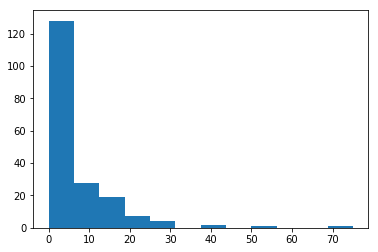

In [30]:
plt.hist(df['absences'], bins=12)

In [33]:
df.loc[df['absences'] > 0].mode()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,16.0,U,GT3,T,4,2,other,other,...,4,3,3,1,1,5,2,10,9.0,11


In [38]:
g1_binarizer = Binarizer(10)
g1_binarizer.fit(df['absences'].values.reshape(-1,1))
g1_a = g1_binarizer.transform(
    df['G1'].values.reshape(-1, 1))
print(g1_grades[0:5], g1_a.mean())

[[0]
 [0]
 [1]
 [0]
 [0]] 0.473684210526


In [39]:
g1_grades_test = g1_binarizer.transform(
    test_df['absences'].values.reshape(-1, 1))
print(g1_grades_test[0:5], g1_grades_test.mean())

[[0]
 [0]
 [0]
 [0]
 [0]] 0.117073170732


# Imputer

Our data has some missing values in the `age` and `G2` columns

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 33 columns):
school        190 non-null object
sex           190 non-null object
age           147 non-null float64
address       190 non-null object
famsize       190 non-null object
Pstatus       190 non-null object
Medu          190 non-null int64
Fedu          190 non-null int64
Mjob          190 non-null object
Fjob          190 non-null object
reason        190 non-null object
guardian      190 non-null object
traveltime    190 non-null int64
studytime     190 non-null int64
failures      190 non-null int64
schoolsup     190 non-null object
famsup        190 non-null object
paid          190 non-null object
activities    190 non-null object
nursery       190 non-null object
higher        190 non-null object
internet      190 non-null object
romantic      190 non-null object
famrel        190 non-null int64
freetime      190 non-null int64
goout         190 non-null int64
Dalc          190 

alternatively:

In [41]:
df.isnull().sum()[df.isnull().sum() > 0]

age    43
G2     56
dtype: int64

Let's set up an `Imputer` object to fill in the missing values for `age`. We'll start by deciding whether the mean, median, or most frequent value is the best option:

In [43]:
df['age'].describe()

count    147.000000
mean      16.659864
std        1.268677
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       19.000000
Name: age, dtype: float64

In [63]:
from scipy.stats import mode

mode(df['age'])

ModeResult(mode=array([ 16.]), count=array([40]))

Our results are as follows:

- Mean: 16.65
- Median: 17
- Mode: 16.0

What is most appropriate? Check in on Slack

In [134]:
# strategy = '' # We'll fill this in based on class response!

age_imputer = Imputer(strategy='median')
age_imputer.fit(df['age'].values.reshape(-1, 1))

ages = age_imputer.transform(
    df['age'].values.reshape(-1, 1))
print(ages[0:5], ages.mean())

[[ 18.]
 [ 15.]
 [ 17.]
 [ 16.]
 [ 17.]] 16.7368421053


In [51]:
age_imputer.statistics_ # returns the value that it will use

array([ 17.])

In [52]:
df['age'].values.shape

(190,)

In [53]:
df['age'].values.reshape(-1, 1).shape

(190, 1)

In [54]:
df['age'].values.reshape(-1, 1)[0:5]

array([[ 18.],
       [ 15.],
       [ nan],
       [ 16.],
       [ nan]])

In [55]:
df['age'].values[0:5]

array([ 18.,  15.,  nan,  16.,  nan])

Now let's apply this to the test df:

In [56]:
print('pre-transform mean:', test_df['age'].mean())
test_age_pre = test_df['age'].values.reshape(-1, 1)

test_age_post = age_imputer.transform(test_age_pre)
print(test_age_post[0:5], test_age_post.mean())

pre-transform mean: 16.683870967741935
[[ 17.]
 [ 17.]
 [ 16.]
 [ 15.]
 [ 17.]] 16.7609756098


# Check for Understanding

The `G2` feature in the dataframe holds the grades at the second check-in for the students. We would like to fill in the missing values present in the data. Please try the following:

1. Use some EDA on the training data (df) to determine whether the most frequent number, the mean, or the median would be the "best" value to fill in.
    - Note, this is left deliberately vague. As a data scientist, it is up to you to decide what "the best" value is. Is staying close to the average value most important? Is looking like other students most important? Are there measures that are similar?
2. Instantiate (create) an `Imputer` object with that strategy
3. Fit it to the training data and then transform the training data. What shape is the transformed training feature? What is the mean of your new column? How does it compare to the distribution of that feature before you filled in the nulls?
4. Transform the same feature in your test data. What is the shape of the transformed test feature? Does it have a similar mean to your training feature? 
5. Should you use the values in the holdout (test) set to inform what the "best" value to impute is? Why or why not?

In [61]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6.0,6
1,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8.0,10
2,GP,F,NaN,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,NaN,15
3,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10.0,10
4,GP,F,NaN,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5.0,6


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 33 columns):
school        190 non-null object
sex           190 non-null object
age           147 non-null float64
address       190 non-null object
famsize       190 non-null object
Pstatus       190 non-null object
Medu          190 non-null int64
Fedu          190 non-null int64
Mjob          190 non-null object
Fjob          190 non-null object
reason        190 non-null object
guardian      190 non-null object
traveltime    190 non-null int64
studytime     190 non-null int64
failures      190 non-null int64
schoolsup     190 non-null object
famsup        190 non-null object
paid          190 non-null object
activities    190 non-null object
nursery       190 non-null object
higher        190 non-null object
internet      190 non-null object
romantic      190 non-null object
famrel        190 non-null int64
freetime      190 non-null int64
goout         190 non-null int64
Dalc          190 

In [64]:
df['G2'].mean()

10.335820895522389

In [65]:
df['G2'].median()

10.0

In [67]:
grade_imputer = Imputer(strategy='median')
grade_imputer.fit(df['G2'].values.reshape(-1, 1))

grades = grade_imputer.transform(
    df['G2'].values.reshape(-1, 1))
print(grades[0:5], grades.mean())

[[  6.]
 [  8.]
 [ 10.]
 [ 10.]
 [  5.]] 10.2368421053


In [68]:
print('pre-transform mean:', test_df['G2'].mean())
test_grade_pre = test_df['G2'].values.reshape(-1, 1)

test_grade_post = grade_imputer.transform(test_age_pre)
print(test_grade_post[0:5], test_grade_post.mean())

pre-transform mean: 11.177215189873417
[[ 17.]
 [ 10.]
 [ 16.]
 [ 15.]
 [ 10.]] 15.0536585366


# PolynomialFeatures

We use `PolynomialFeatures` a little less frequently than other preprocessing libraries. However, it can be useful to add a $\text{term}^2$ term to our linear models to capture non-linear effects:

In [137]:
poly_features = PolynomialFeatures(2, include_bias=False)
poly_features.fit(df['G3'].values.reshape(-1, 1))

age_and_age_squared = poly_features.transform(
    df['G3'].values.reshape(-1, 1))

print(age_and_age_squared[0:5, :])
print (age_and_age_squared.shape)
print (type(age_and_age_squared))

[[   6.   36.]
 [  10.  100.]
 [  15.  225.]
 [  10.  100.]
 [   6.   36.]]
(190, 2)
<class 'numpy.ndarray'>


# Check for Understanding (15-20 minutes)

Working together in a group or pair, answer the following questions. Questions 1-3 refers to the following "model":

$$ \hat{y} = 2 + x - 0.5x^2 $$ 

1. What is $\hat{y}$ at the following values for x?
    - $x = -3$
    - $x = -1$
    - $x = 0$
    - $x = 1$
    - $x = 3$
2. Use Python to check your work for section 1.
3. Does $\hat{y}$ change at a linear rate with $x - 0.5x^2$? Is this useful from a modeling perspective?
4. Use `PolynomialFeatures` and the `studytime` feature to create a feature for $\text{studytime}$ and $\text{studytime}^2$. 

-5.5
-3 -5.5
-1 0.5
0 2.0
1 2.5
3 0.5


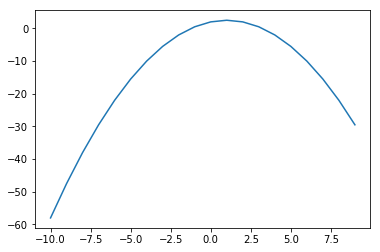

In [108]:
# Richards Code 

def model(x):
    return 2 + x - 0.5*(x**2)

print(model(-3))
for x in [-3, -1, 0, 1, 3]:
    print(x, model(x))
    
xs = list(range(-10, 10))
ys = [model(x) for x in xs]

plt.plot(xs, ys)

In [107]:
def calculate(x): 
    y= 2 + x - (0.5*x**2)
    return y 


# print (calculate(-3))
# print (calculate(-1))
# print (calculate(0))
# print (calculate(1))
# print (calculate(3))


x = [-3,-1,0,1,3]
for i in x: 
    print (i, calculate(i))

-3 -5.5
-1 0.5
0 2.0
1 2.5
3 0.5


In [96]:
X = -3 
y = 2 + X - (0.5 * X **2)
print (y)

-5.5


In [97]:
X = -1
y = 2 + X - (0.5 * X **2)
print (y)

0.5


In [98]:
X = 0 
y = 2 + X - (0.5 * X **2)
print (y)

2.0


In [99]:
X = 1 
y = 2 + X - (0.5 * X **2)
print (y)

2.5


In [100]:
X = 3 
y = 2 + X - (0.5 * X **2) 
print (y)

0.5


# Scalers

Let's look at a scatter plot of our training data between `G1` and `G3`

<class 'numpy.ndarray'>
(190, 2)


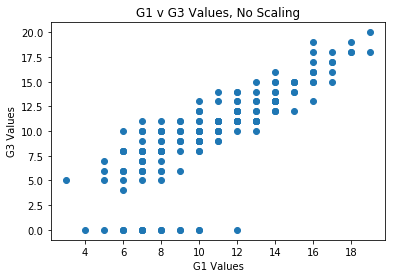

In [112]:
g1_g3 = df[['G1', 'G3']].values
print (type(g1_g3))
print (g1_g3.shape)
plt.scatter(g1_g3[:, 0], g1_g3[:, 1])
plt.xlabel('G1 Values')
plt.ylabel('G3 Values')
plt.title('G1 v G3 Values, No Scaling')

Let's use `MinMaxScaler`, `StandardScaler`, and `RobustScaler` to transform these values and see if visually, there is any difference:

In [113]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(g1_g3)

ss_scaler = StandardScaler()
ss_scaler.fit(g1_g3)

rb_scaler = RobustScaler()
rb_scaler.fit(g1_g3)

/Users/ajinthchristudas/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/ajinthchristudas/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

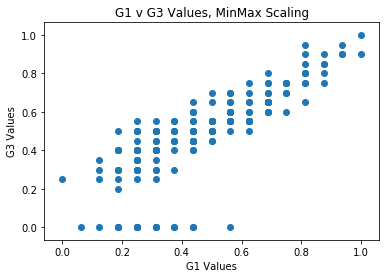

In [114]:
mm_g1g3 = mm_scaler.transform(g1_g3)

plt.scatter(mm_g1g3[:, 0], mm_g1g3[:, 1])
plt.xlabel('G1 Values')
plt.ylabel('G3 Values')
plt.title('G1 v G3 Values, MinMax Scaling')

/Users/ajinthchristudas/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


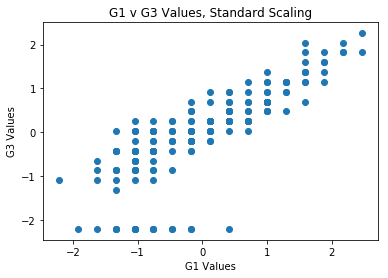

In [115]:
ss_g1g3 = ss_scaler.transform(g1_g3)

plt.scatter(ss_g1g3[:, 0], ss_g1g3[:, 1])
plt.xlabel('G1 Values')
plt.ylabel('G3 Values')
plt.title('G1 v G3 Values, Standard Scaling')

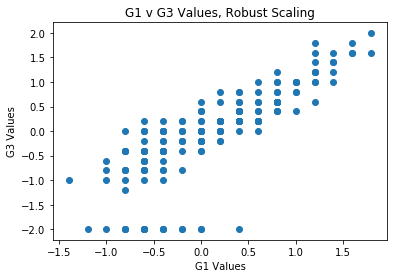

In [116]:
rb_g1g3 = rb_scaler.transform(g1_g3)

plt.scatter(rb_g1g3[:, 0], rb_g1g3[:, 1])
plt.xlabel('G1 Values')
plt.ylabel('G3 Values')
plt.title('G1 v G3 Values, Robust Scaling')

In fact, we could plot all of these on top of each other:

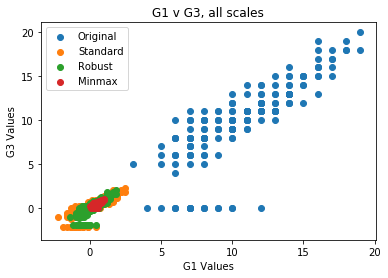

In [117]:
plt.scatter(g1_g3[:, 0], g1_g3[:, 1], 
            label='Original')
plt.scatter(ss_g1g3[:, 0], ss_g1g3[:, 1],
           label='Standard')
plt.scatter(rb_g1g3[:, 0], rb_g1g3[:, 1],
           label='Robust')
plt.scatter(mm_g1g3[:, 0], mm_g1g3[:, 1], 
            label='Minmax')
plt.xlabel('G1 Values')
plt.ylabel('G3 Values')
plt.legend()
plt.title('G1 v G3, all scales')

Or, to look at the three scales on top of each other, zoomed-in:

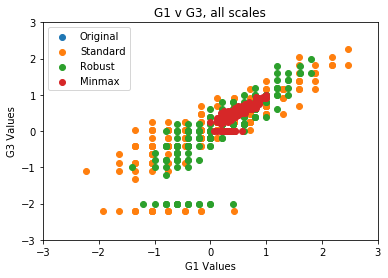

In [118]:
plt.scatter(g1_g3[:, 0], g1_g3[:, 1], 
            label='Original')
plt.scatter(ss_g1g3[:, 0], ss_g1g3[:, 1],
           label='Standard')
plt.scatter(rb_g1g3[:, 0], rb_g1g3[:, 1],
           label='Robust')
plt.scatter(mm_g1g3[:, 0], mm_g1g3[:, 1], 
            label='Minmax')
plt.xlabel('G1 Values')
plt.ylabel('G3 Values')
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.legend()
plt.title('G1 v G3, all scales')

Scaling will not change the relationship between variables, just the scale that those values are on. 

If you want to see the average that is being used for each scaler, the following attributes are stored after fitting. Note that because each scaler is using different ways to get to the same place, each object has different attributes

In [119]:
print(mm_scaler.data_range_, 
      mm_scaler.data_min_, 
      mm_scaler.data_max_)
print(ss_scaler.mean_, ss_scaler.var_)
print(rb_scaler.center_, rb_scaler.scale_)

[ 16.  20.] [ 3.  0.] [ 19.  20.]
[ 10.57894737   9.87368421] [ 11.62271468  19.93141274]
[ 10.  10.] [ 5.  5.]


# Check for Understanding

1. Replicate the plotting and scaling above, this time comparing `age` and `G3` (note, because `age` has missing values, you will need to transform that data first). 
2. Why would scaling help us understand the relationship between `age` and `G3`?
    - One helpful way to think about this is to think about what a one-unit change in each means. How much of the total distribution do you cover if you go up by one unit in `age`? What about for `G3`?
3. Apply the standard scaler transformer to the holdout (test) set. 
4. What is the mean held in the standard scaler object (`ss_scaler.mean_`)?
5. What is the mean held in each of the features in the holdout (test) set?
6. Are they different? Why or why not?